<a href="https://colab.research.google.com/github/truongthuanr/self-project/blob/main/07_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MNIST**


MNIST is a dataset with large number of image of digits handwritten. Each image is labeled with the digit it represents.

ScikitLearn provides helper functions to download this dataset.

Let's download the dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Get data and target label by `data` and `target` key

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

The data contain 70,000 images, and 784 feature for each image. This is because each image is 28x28 pixels, each feature represents one pixel's intensity, from 0(white) to 255(black).

**Visualizing the image**

Let's take a digit data, reshape it to a 28x28 array, and display using imshow()

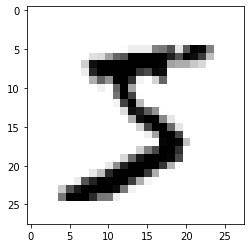

In [4]:
import matplotlib.pyplot as plt

dig = X[0]
dig_image = dig.reshape(28,28)

plt.imshow(dig_image, cmap = "binary")

Check the label of the above image

Turn label to number

In [12]:
y = y.astype(int)

Now, let's show the 100 first image in our data!!

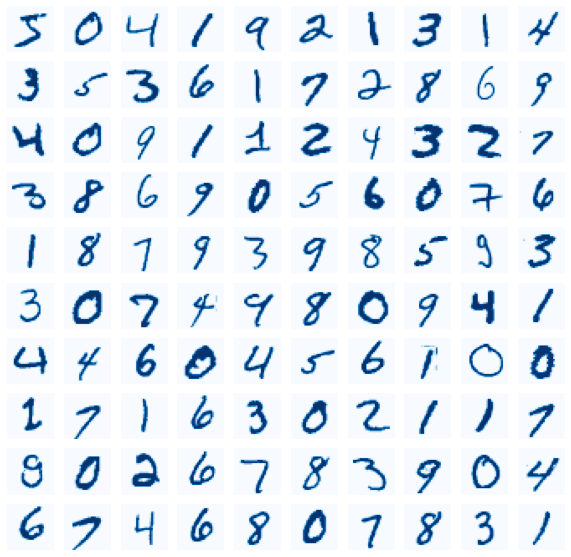

In [13]:
num = 10
fig = plt.figure(figsize=(10,10))
for i in range(0,num):
  for ii in range(0,num):
    index = i*num+ii;
    ax = fig.add_subplot(num,num,index+1)
    ax.imshow(X[index].reshape(28,28), cmap="Blues")
    ax.axis("off")



**Split data to train and test set**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [16]:
X_train.shape,X_test.shape

((56000, 784), (14000, 784))

## Binary Classifier - SGDClassifier

Now we simplify the problem by try to identify one digit, for examplex with 8.

Create the target for identify digis 8

In [17]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

Pick the Stochastic Gradient Descent (SGD) classifier model.

In [18]:
from sklearn.linear_model import SGDClassifier

In [27]:
sgd_clf = SGDClassifier(random_state=99)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=99, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Evaluate model by `cross_val_score` from scikit-learn

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.92821557, 0.86709166, 0.94026572])

**Precision and Recall**

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [32]:
y_train_pred =  cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [39]:
y_score = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

Get the precision and recall value

In [33]:
precision_score(y_train_8, y_train_pred)

0.5315110098709187

In [38]:
recall_score(y_train_8, y_train_pred)

0.7729112992270887

Using `precision_recall_curve()` function to compure precision an recall for all possible thresholds

In [35]:
from sklearn.metrics import precision_recall_curve

Plot precision and recall as functiolns of the threshold value

In [69]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")


Text(0.5, 0, 'Thresholds')

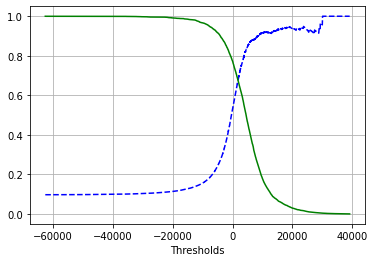

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_score)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.grid(True)
plt.xlabel("Thresholds")

**The ROC curve**

ROC(Receiver operating characteristic) curve plot the true positive rate a gainst the false positive rate.

Using `roc_curve`

In [72]:
from sklearn.metrics import roc_curve

FPR(False Positive Rate) is the ratio of negative instances that are incorrectly classified as positive.

TPR(True Positive Rate)  = Recall

Plot the ROC

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')

Text(0, 0.5, 'True Positive Rate (Recall)')

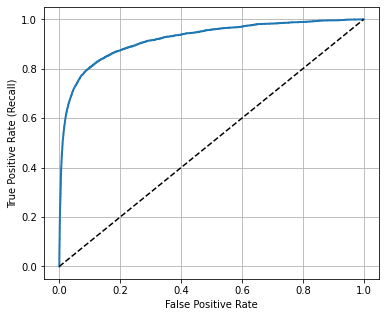

In [83]:
fpr, tpr, thresholds = roc_curve(y_train_8, y_score)
fig = plt.figure(figsize=(6,5))
plot_roc_curve(fpr, tpr)
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")

**Area Under the Curve (AUC)**

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y_train_8, y_score)

0.921139680778985

# RandomForestClassifier 

Let's train a RandomForest and compare its ROC curve and ROC AUC score the SGDClassifier.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
forest_clf = RandomForestClassifier(random_state=99)
y_probas_fores = cross_val_predict(forest_clf, X_train, y_train_8, cv=3, method="predict_proba")